# Prepare the data for the bar plots

In [1]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.3f}'.format

df = pd.read_pickle('output/critical_long_format.pickle')

# transform seconds to hours
df['hours'] = df['secs'] / 3600

# rename values of the daytype for the plots
df['Daytype'] = 'A. Weekday'
df.loc[~df.is_weekday, 'Daytype'] = 'B. Saturdays & Sundays'

# rename values of the critical times
df['Critical'] = df.critical.replace( {
    True:'Critical (11:00-15:00)',
    False: 'Other (15:00-11:00)'})

# sort by the critical, so bars appear in the right order
df = df.sort_values('Critical')

# Probability of customer charging (and kWh per costumer) for mailed and not mailed customers during event days

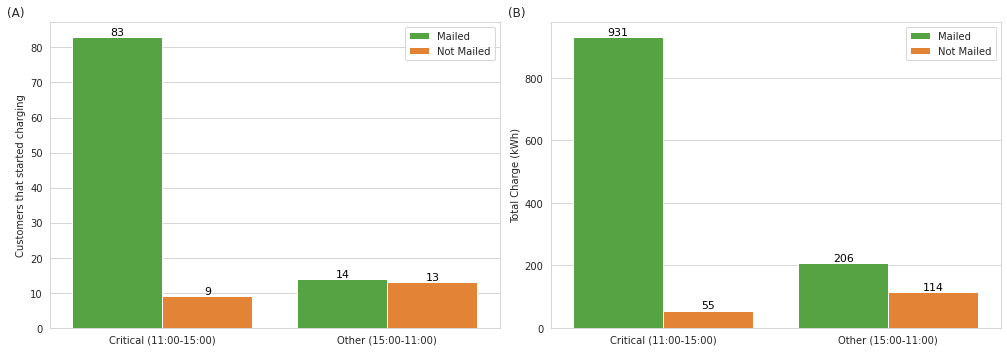

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
sns.set_palette([ (0.3, 0.7, 0.2), (1.0, 0.5, 0.1), (0.2, 0.5, 0.8)])
hue_order=['Mailed', 'Not Mailed']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5), sharey=False, )

#copy the dataframe to avoid conflicts with other plots
dfplot = df.copy()


# rename values of the condtion for the plots
dfplot['Customer'] = 'Not Mailed'
dfplot.loc[dfplot.mailed & dfplot.mailday,'Customer'] = 'Mailed'


#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,10), sharey=True, )
sns.barplot(data=dfplot[dfplot.mailday], x="Critical", y="charge_started",  
            hue="Customer", hue_order=hue_order, estimator=sum, ax=ax1, ci=None)
sns.barplot(data=dfplot[dfplot.mailday], x="Critical", y="charge", 
            hue="Customer", hue_order=hue_order, estimator=sum, ax=ax2, ci=None)


ax1.set_ylabel('Customers that started charging')
ax2.set_ylabel('Total Charge (kWh)')
ax1.set_xlabel('')
ax2.set_xlabel('')

ax1.set_title('(A)', y=1, x=-.075)
ax2.set_title('(B)', y=1, x=-.075)

ax1.legend().set_title('')
ax2.legend().set_title('')

for p in ax1.patches:
             ax1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                 textcoords='offset points')
        
for p in ax2.patches:
     ax2.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
         textcoords='offset points')

plt.tight_layout()

In [3]:
# Rename of varibles (for better visualizations) 
dfplot['Charge Started'] = dfplot['charge_started'].astype('float')
dfplot['kWh'] = dfplot['charge']

# Display main statistics
dfplot[dfplot.mailday].groupby(['Critical', 'Customer']).agg({
    'kWh': ['count', 'mean', 'std'],
    'Charge Started': ['count', 'mean', 'std']})

kWh             Charge Started            
                                  count  mean   std          count  mean   std
Critical               Customer                                               
Critical (11:00-15:00) Mailed      2013 0.462 2.577           2013 0.041 0.199
                       Not Mailed  2121 0.026 0.584           2121 0.004 0.065
Other (15:00-11:00)    Mailed      2013 0.102 1.034           2013 0.007 0.083
                       Not Mailed  2121 0.054 0.789           2121 0.006 0.078

In [4]:
# Rename of varibles (for better visualizations) 
dfplot['Charge Started'] = dfplot['charge_started'].astype('float')
dfplot['kWh'] = dfplot['charge']

dfplot['Day of Week'] = dfplot['is_weekday'].map({
    False: 'Monday - Friday',
    True: 'Saturday, Sunday, Holiday'
})

# Display main statistics
dfplot[dfplot.mailday].groupby(['Day of Week', 'Critical', 'Customer']).agg({
    'kWh': ['count', 'mean', 'std'],
    'Charge Started': ['count', 'mean', 'std']})

kWh              \
                                                            count  mean   std   
Day of Week               Critical               Customer                       
Monday - Friday           Critical (11:00-15:00) Mailed       911 0.601 3.063   
                                                 Not Mailed   997 0.028 0.757   
                          Other (15:00-11:00)    Mailed       911 0.096 0.837   
                                                 Not Mailed   997 0.071 0.982   
Saturday, Sunday, Holiday Critical (11:00-15:00) Mailed      1102 0.347 2.086   
                                                 Not Mailed  1124 0.024 0.368   
                          Other (15:00-11:00)    Mailed      1102 0.108 1.172   
                                                 Not Mailed  1124 0.038 0.563   

                                                            Charge Started  \
                                                                     count   
Day of Week               Critical               Customer                    
Monday - Friday           Critical (11:00-15:00) Mailed                911   
                                                 Not Mailed            997   
                          Other (15:00-11:00)    Mailed                911   
                                                 Not Mailed            997   
Saturday, Sunday, Holiday Critical (11:00-15:00) Mailed               1102   
                                                 Not Mailed           1124   
                          Other (15:00-11:00)    Mailed               1102   
                                                 Not Mailed           1124   

                                                                         
                                                             mean   std  
Day of Week               Critical               Customer                
Monday - Friday           Critical (11:00-15:00) Mailed     0.050 0.219  
                                                 Not Mailed 0.004 0.063  
                          Other (15:00-11:00)    Mailed     0.007 0.081  
                                                 Not Mailed 0.007 0.084  
Saturday, Sunday, Holiday Critical (11:00-15:00) Mailed     0.034 0.180  
                                                 Not Mailed 0.004 0.067  
                          Other (15:00-11:00)    Mailed     0.007 0.085  
                                                 Not Mailed 0.005 0.073

# Probabilty of a customer charging including no-event days

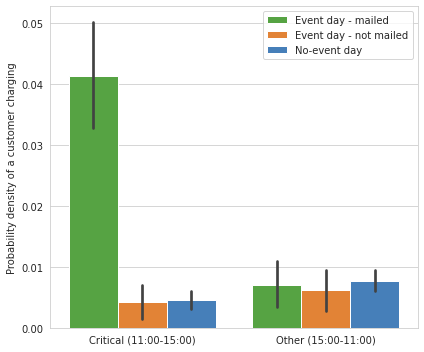

In [5]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
sns.set_palette([ (0.3, 0.7, 0.2), (1.0, 0.5, 0.1), (0.2, 0.5, 0.8)])

fig, ax= plt.subplots(figsize=(6,5))


# order of legend
hue_order=['Event day - mailed', 'Event day - not mailed', 'No-event day']

#copy the dataframe to avoid conflicts with other plots
dfplot = df.copy()

# rename values of the daytype for the plots
dfplot['Condition'] = 'No-event day'
dfplot.loc[dfplot.mailed & dfplot.mailday,'Condition'] = 'Event day - mailed'
dfplot.loc[~dfplot.mailed & dfplot.mailday,'Condition'] = 'Event day - not mailed'

dfplot['charge'] = dfplot['charge'] / 1000


#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,10), sharey=True, )
sns.barplot(data=dfplot, x="Critical", y="charge_started", 
            hue="Condition", hue_order=hue_order, ax=ax, ci=95)#, ci=None)

ax.set_ylabel('Probability density of a customer charging')
ax.set_xlabel('')

ax.legend().set_title('')

plt.tight_layout()


In [6]:
# Rename of varibles (for better visualizations) 
dfplot['Charge Started'] = dfplot['charge_started'].astype('float')

# Display main statistics
dfplot.groupby(['Critical', 'Condition']).agg({
    'Charge Started': ['count', 'mean', 'std']})

Charge Started            
                                                       count  mean   std
Critical               Condition                                        
Critical (11:00-15:00) Event day - mailed               2013 0.041 0.199
                       Event day - not mailed           2121 0.004 0.065
                       No-event day                     9222 0.005 0.067
Other (15:00-11:00)    Event day - mailed               2013 0.007 0.083
                       Event day - not mailed           2121 0.006 0.078
                       No-event day                     9222 0.008 0.087